In [1]:
import numpy as np
from utils import load_cifar10
import matplotlib.pyplot as plt

In [2]:
X_train, y_train, X_test, y_test = load_cifar10('/home/ashwin/Documents/datasets/cifar-10-batches-py/')

In [3]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test  = X_test.reshape(X_test.shape[0], -1)

In [4]:
# normalizing image data
img_mean = X_train.mean(axis=0)
img_stdv = X_train.std(axis=0)

X_train  = (X_train - img_mean[:,])/img_stdv[:,]
X_test   = (X_test  - img_mean[:,])/img_stdv[:,]

In [5]:
print('shape of X_train:', X_train.shape, '& shape of y_train:', y_train.shape)

shape of X_train: (50000, 3072) & shape of y_train: (50000,)


# Single neuron linear model

In [6]:
n, m = X_train.shape # number of examples, feature dimensions
c = 10 # number of classes

In [7]:
W = np.random.rand(c, m)*0.01
b = np.zeros(c)
print('shape of W:', W.shape, '& shape of b:', b.shape)

shape of W: (10, 3072) & shape of b: (10,)


In [8]:
# Compute Model scores
S = X_train@W.T + b
print('shape of score matrix S:', S.shape)

shape of score matrix S: (50000, 10)


In [9]:
def softmax(S):
    S -= np.max(S, axis=1, keepdims=True) #subtract max from each example for numerical stability
    S_exp   = np.exp(S)
    softmax = S_exp/(np.sum(S_exp, axis=1, keepdims=True))
    return softmax

In [10]:
# Compute softmax from class scores
A = softmax(S)
print('shape of activation/probability matrix A:', A.shape)

shape of activation/probability matrix A: (50000, 10)


In [11]:
# Calculate Cross Entropy loss
loss = -np.sum(np.log(A[np.arange(n), y_train]))
print('loss:',loss)

loss: 115014.36858692675


In [12]:
# d_loss/d_score

dS = A 
dS[np.arange(n), y_train] -= 1

print('shape of dL/dS:', dS.shape)

shape of dL/dS: (50000, 10)


In [13]:
# calculate weight gradients

dW = dS.T@X_train
db = dS.sum(axis=0)

print('shape of dL/dW:', dW.shape)
print('shape of dL/db:', db.shape)

shape of dL/dW: (10, 3072)
shape of dL/db: (10,)


In [14]:
# update weights with learning rate lr
lr = 0.01

W -= lr*dW
b -= lr*b

#### Model is built with above procedure, It is present in same directory under the name linearClassifier.py.  
#### Importing the model to test the performance

# Test Model

In [15]:
from linearClassifier import Linear

In [16]:
clf = Linear()

In [17]:
clf.train(X_train, y_train)

In [18]:
y_pred = clf.predict(X_test)
accuracy = np.mean(y_pred==y_test)
print('Accuracy on test data:',accuracy)

Accuracy on test data: 0.2033


# Visualizing Model Weights

In [19]:
def scale(X):
    return np.array( 255*(X-min(X))/(max(X)-min(X)) , dtype=int)

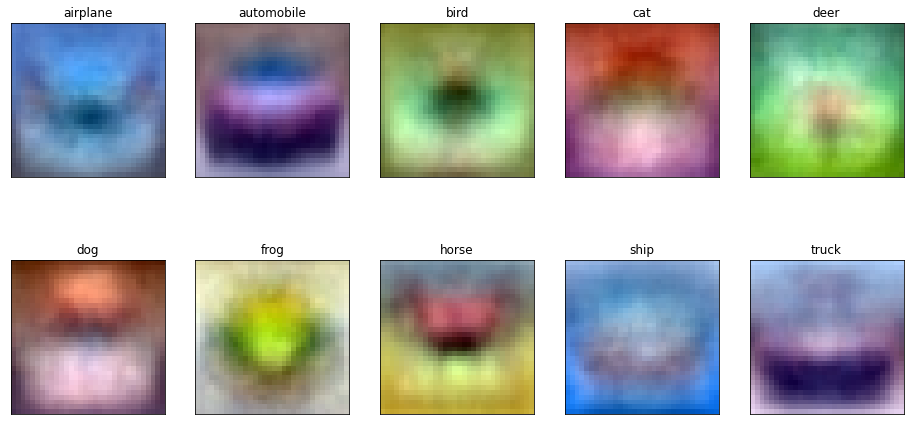

In [20]:
label_names = ['airplane',  'automobile',  'bird',  'cat',  'deer',  'dog',  'frog',  'horse',  'ship',  'truck']

fig, ax = plt.subplots(2,5, figsize=(16,8))
for i in range(c):
    img = scale(clf.W[i]).reshape(32,32,3)
    ax[i//5,i%5].imshow(img)
    ax[i//5,i%5].set_title(label_names[i])
    ax[i//5,i%5].axes.xaxis.set_visible(False)
    ax[i//5,i%5].axes.yaxis.set_visible(False)